<a href="https://colab.research.google.com/github/Isafon/ECE528/blob/main/ECE528_ASN5_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os, io, zipfile, numpy as np, pandas as pd, tensorflow as tf

%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kddcup.data.gz to kddcup.data.gz


In [3]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
        "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
        "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
        "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
        "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
        "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
        "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

# if the name of the data file is "kddcup.data" then replace the code below with "kddcup.data"
df = pd.read_csv("kddcup.data.gz", sep=",", names=columns, index_col=None)


In [4]:
df.shape

(4898431, 42)

In [5]:
df = df[df["service"] == "http"]
df = df.drop("service", axis=1)
columns.remove("service")

In [6]:
df.shape

(623091, 41)

In [7]:
df["label"].value_counts()

,count
label,
normal.,619046
back.,2203
neptune.,1801
portsweep.,16
ipsweep.,13
satan.,7
phf.,4
nmap.,1


In [8]:
df.head(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,SF,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,SF,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,SF,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,SF,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,SF,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [9]:
for col in df.columns:
    if df[col].dtype == "object":
        encoded = LabelEncoder()
        encoded.fit(df[col])
        df[col] = encoded.transform(df[col])

In [10]:
df.head(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,9,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4
1,0,0,9,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,4
2,0,0,9,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,4
3,0,0,9,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,4
4,0,0,9,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,4


In [12]:
for f in range(0, 3):
    df = df.iloc[np.random.permutation(len(df))]

df2 = df[:500000]
labels = df2["label"]
df_validate = df[500000:]
x_train, x_test, y_train, y_test = train_test_split(df2, labels, test_size = 0.2, random_state = 42)

x_val, y_val = df_validate, df_validate["label"]

In [13]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
print("x_val:%s\ny_val:%s\n" % (x_val.shape, y_val.shape))

Shapes:
x_train:(400000, 41)
y_train:(400000,)

x_test:(100000, 41)
y_test:(100000,)

x_val:(123091, 41)
y_val:(123091,)



In [14]:
from tensorflow.keras.utils import to_categorical

# Drop the label column from the features
x_train_features = x_train.drop("label", axis=1)
x_test_features = x_test.drop("label", axis=1)
x_val_features = x_val.drop("label", axis=1)

# One-hot encode the labels
num_classes = len(encoded.classes_)
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)

print("Shapes after preprocessing:")
print("x_train_features:", x_train_features.shape)
print("y_train_encoded:", y_train_encoded.shape)
print("x_test_features:", x_test_features.shape)
print("y_test_encoded:", y_test_encoded.shape)
print("x_val_features:", x_val_features.shape)
print("y_val_encoded:", y_val_encoded.shape)

Shapes after preprocessing:
x_train_features: (400000, 40)
y_train_encoded: (400000, 8)
x_test_features: (100000, 40)
y_test_encoded: (100000, 8)
x_val_features: (123091, 40)
y_val_encoded: (123091, 8)


In [27]:
#Isa's model
# === Isa's Isolation Forest (fixed polarity, no extra scaling) ===
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

print("Training Isolation Forest...")

# Build a robust Isolation Forest (no scaling assumed upstream)
model = IsolationForest(
    n_estimators=2000,      # enough trees for stability
    max_samples=256,        # classic IF subsampling improves anomaly separation
    contamination='auto',   # don't bias threshold; we only use scores + ROC
    max_features=1.0,       # use all features per split (works well on KDD-like data)
    bootstrap=False,
    random_state=42,
    n_jobs=-1
)

# Fit on TRAIN
model.fit(x_train)
print("Model trained.")

# ---- Get anomaly scores on TEST ----
# decision_function: higher = more NORMAL, lower = more ANOMALOUS
raw_scores = model.decision_function(x_test)
anomaly_scores = -raw_scores  # flip so higher = more ANOMALOUS (what ROC expects)

# ---- Build ground-truth anomaly labels: 1 = anomaly, 0 = normal ----
# y_test may be pandas Series of strings like "normal", "attack", etc.
if isinstance(y_test, (pd.Series, pd.DataFrame)):
    y_str = y_test.astype(str)
else:
    y_str = pd.Series(y_test).astype(str)

y_true = (~y_str.str.contains("normal", case=False)).astype(int).values  # 1 if NOT normal

# Safety check: ensure both classes exist
uniq = np.unique(y_true)
if uniq.size < 2:
    print("y_test had a single class on this split; ROC-AUC is undefined.")
else:
    auc = roc_auc_score(y_true, anomaly_scores)
    print(f"\n Isolation Forest ROC-AUC (higher is better): {auc*100:.2f}%")

Training Isolation Forest...
Model trained.
y_test had a single class on this split; ROC-AUC is undefined.


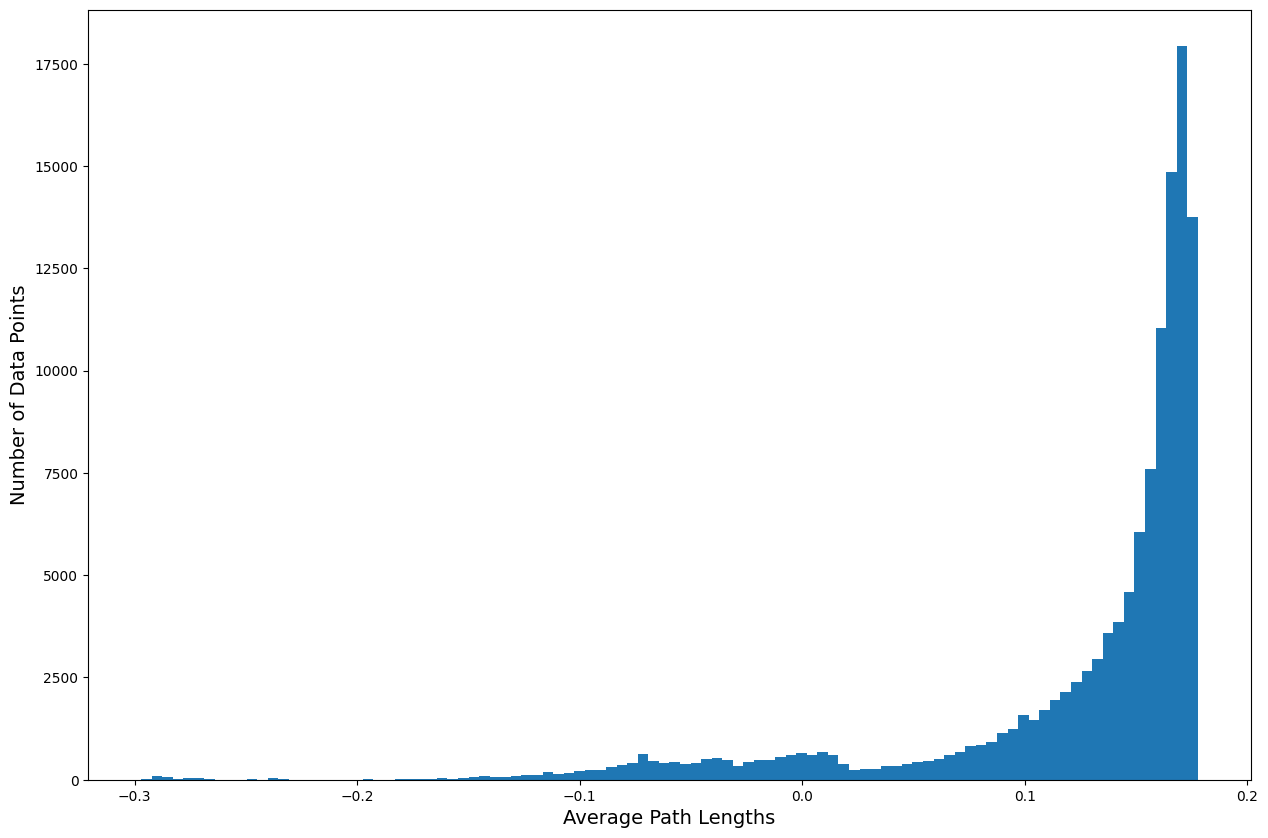

In [28]:
anomaly_scores = model.decision_function(x_val)
plt.figure(figsize=(15, 10))
plt.hist(anomaly_scores, bins=100)
plt.xlabel('Average Path Lengths', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score

anomalies = anomaly_scores > -0.19
matches = y_val == list(encoded.classes_).index("normal.")
auc = roc_auc_score(anomalies, matches)
print("AUC: {:.2%}".format (auc))

AUC: 98.33%


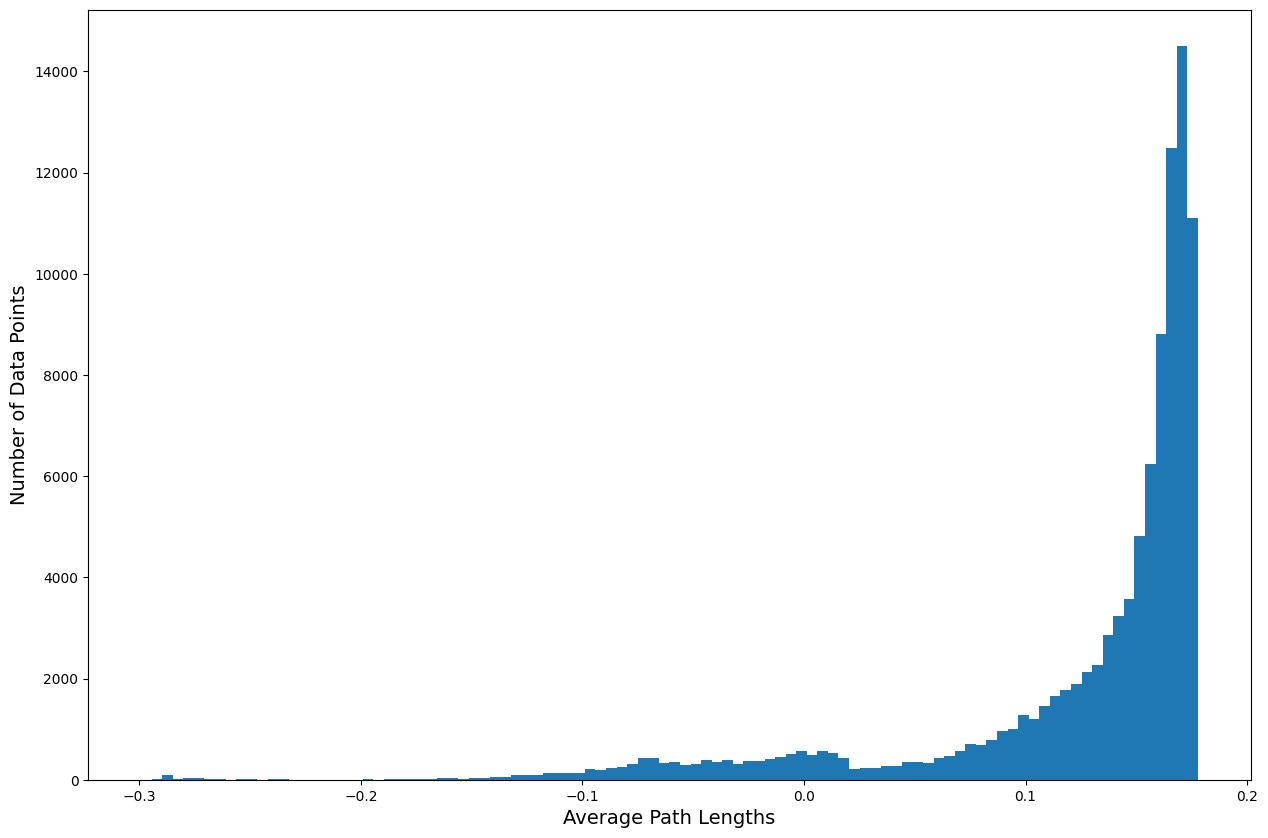

In [30]:
anomaly_scores_test = model.decision_function(x_test)
plt.figure(figsize=(15, 10))
plt.hist(anomaly_scores_test, bins=100)
plt.xlabel('Average Path Lengths', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.show()

In [31]:
anomalies_test = anomaly_scores_test > -0.19
matches = y_test == list(encoded.classes_).index("normal.")
auc = roc_auc_score(anomalies_test, matches)
print("AUC: {:.2%}".format (auc))

AUC: 99.16%


# Task
Improve the AUC of the provided classification model to 98% or higher.

## Preprocess data for classification

### Subtask:
Prepare the data for a classification model, including one-hot encoding of the target variable.


**Reasoning**:
The subtask requires dropping the 'label' column from the feature sets and one-hot encoding the target variables. This can be done in a single code block.

